# Time Series Forescasting

In [31]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [35]:
def parser(x):
    return datetime.strptime(x,'%Y-%m-%d')

sales = pd.read_csv('sales-cars.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

In [36]:
sales.head()

,Sales
Month,
2012-01-01,22
2012-01-08,37
2012-01-15,38
2012-01-22,24
2012-02-01,41


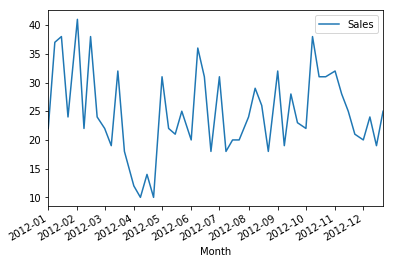

In [38]:
sales.plot()

Stationary means mean, variance and covariance is constant over periods.

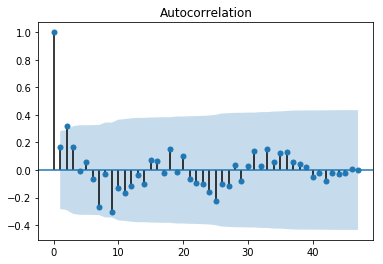

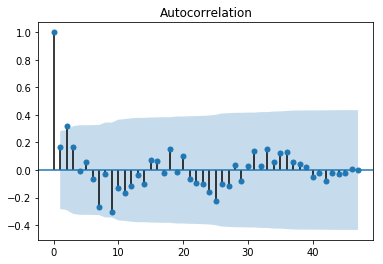

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

### Converting series to stationary

In [40]:
sales.head()

,Sales
Month,
2012-01-01,22
2012-01-08,37
2012-01-15,38
2012-01-22,24
2012-02-01,41


In [41]:
sales.shift(1)

,Sales
Month,
2012-01-01,NaN
2012-01-08,22.0
2012-01-15,37.0
2012-01-22,38.0
2012-02-01,24.0
2012-02-08,41.0
2012-02-15,22.0
2012-02-22,38.0
2012-03-01,24.0


In [42]:
sales_diff = sales.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


In [43]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales
Month,
2012-01-08,15.0
2012-01-15,1.0
2012-01-22,-14.0
2012-02-01,17.0
2012-02-08,-19.0


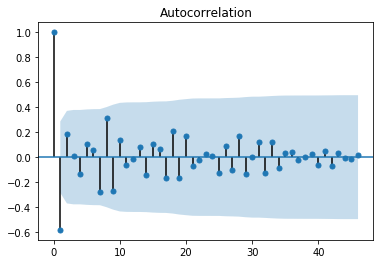

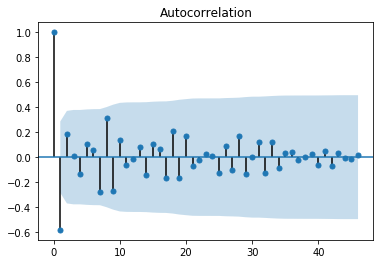

In [44]:
plot_acf(sales_diff)

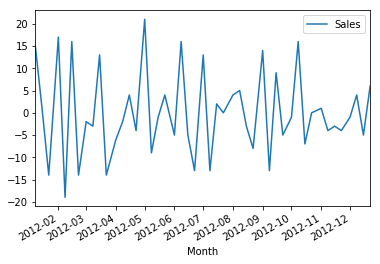

In [45]:
sales_diff.plot()

In [13]:
X = sales.values
train = X[0:27] # 27 data as train data
test = X[26:]  # 9 data as test data
predictions = []

In [14]:
train.size

27

# Autoreggresive AR Model

In [15]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [16]:
predictions = model_ar_fit.predict(start=26,end=36)

In [17]:
test

array([[316],
       [439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]])

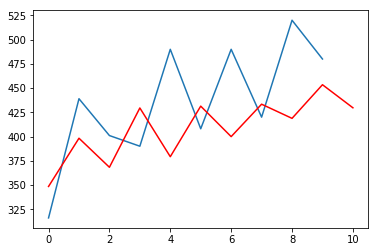

In [20]:
plt.plot(test)
plt.plot(predictions,color='red')

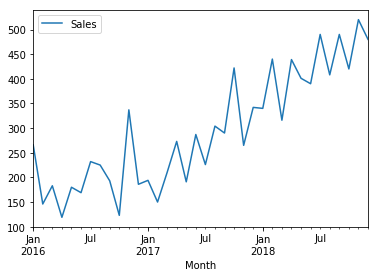

In [21]:
sales.plot()

# ARIMA model

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

297.161984038112


/Users/christian/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [24]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([396.0550249 , 355.95462713, 413.10571224, 374.51904308,
       446.96273662, 378.64644802, 406.40229938, 411.41280429,
       475.92663268, 415.42419075])

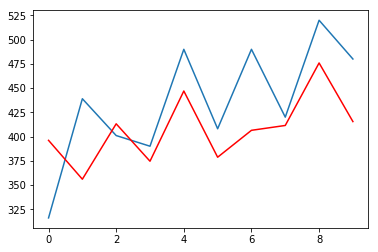

In [27]:
plt.plot(test)
plt.plot(predictions,color='red')

In [28]:
mean_squared_error(test,predictions)

2958.0198642474816

In [29]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [30]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.25060028714074
(0, 0, 3) nan
(0, 0, 4) 310.1669328577808
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841530678005
(0, 1, 2) 296.3229226907689
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.10194864931043
(1, 0, 0) 316.1668717522317
(1, 0, 2) 310.97906422217227
(1, 0, 4) 309.67799311480894
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.12565112584997
(1, 1, 2) 299.47166670625876
(1, 1, 3) 301.2851180948257
(1, 1, 4) nan
(1, 2, 0) 306.5307767571543
(1, 2, 3) 290.3253394346377
(2, 0, 0) 310.99695736148806
(2, 1, 0) 300.2089561239962
(2, 1, 1) 297.9999930167355
(2, 1, 2) 298.55054281302193
(2, 1, 3) 302.8720815323284
(2, 2, 0) 306.2975856432374
(2, 2, 3) nan
(3, 0, 0) 312.9838587422689
(3, 0, 4) nan
(3, 1, 0) 294.854358421861
(3, 1, 1) 295.99793534185477
(3, 1, 2) 292.6686238693931
(3, 1, 3) 294.65889075164176
(3, 2, 0) 299.40758681563216
(3, 2, 4) 291.2750489658189
(4, 0, 0) 311.07065620339836
(4, 0, 1) 321.7284716608025
(4, 0, 2